# Trabalho 6
**Para o conjunto de dados disponível no arquivo "Trabalho6dados.xlsx", utilizar
backpropagation por Levenberg-Marquardt para treinar os pesos da RNA criada no Trabalho 5, Parte 2. Testar diferentes condições iniciais e diferentes parâmetros da otimização visando o melhor resultado possível para função custo $\frac{1}{2} MSE$ Normalizar e desnormalizar os dados.**

## **Parte 1:**
**Montar uma rede neural artificial cuja saída seja $y$ e as entradas sejam $(x_1, x_2)$ de acordo com:**

$$y = \phi_2 (b_{2,1} + \sum^2_{i=1} w_{2,1,i}y_i')$$

$$y'_i = \phi_1 (b_{1,i} + \sum^2_{j=1} w_{1,i,j}x_j)$$

- Com $\phi_1$ tangente hiperbólica e $\phi_2$ linear.
- Os parâmetros $w$ e $b$ são quaisquer.
- A rede deve ser montada em um código executável e desenhado seu diagrama de blocos utilizando o diagrama do neurônio artificial e da rede feedforward.

#Backpropagation
O objetivo da retropropagação do erro é otimizar os pesos para que a rede neural possa aprender a mapear corretamente as entradas para as saídas.

Para qualquer problema de aprendizagem supervisionada é necessário encontrar um conjunto de pesos $W$ que minimize a saída de $E(W)$, onde $E(W)$ é a função de perda, ou o erro da rede.

Para realizar a retropropagação do erro é necessário utilizar o erro entre o conjunto de dados e a saída da rede neural para calcular o ajuste de parametros ($\Delta w$) para a otimização dos resultados utilizando Levenberg-Marquardt.

Primordialmente, convém definir o erro utilizado na avaliação do processo de treinamento. Dada uma amostra de treinamento:

$$  = \{ x(n), d(n)\}_{n=1}^N $$

O sinal de erro produzido como output do neurônio $j$ é:

$$e_j(n) = d_j(n) - y_j(n)$$

E portanto, a média quadrática do erro (MSE):

$$E(N) = \frac{1}{2N} \sum_{n=1}^N \sum_{j \in C}  e^2_{j}(n)$$

Onde:
- $d_j(n)$: n-ésimo elemento do vetor com as saidas desejadas
- $y_j(n)$: n-ésimo elemento do vetor com as saidas atuais
- $N$: número de amostras
- $C$: conjunto de neurônios na camada

Dado um neurônio $j$ sendo alimentado por um conjunto de sinais produzidos pela entrada da camada a sua esquerda, temos que o *induced local field*  $v_j(n)$ produzido na entrada da função de ativação associada ao neurônio $j$ é:

$$v_j(n) = \sum_{i=0}^m w_{ji}(n)x_i(n)$$

Onde $m$ corresponde a dimensão dos inputs do neurônio $j$. Assim, a saída $y_j(n)$ do neurônio $j$ na n-ésima iteração é dada por:

$$y_j(n) = \phi_j (v_j(n))$$

Assim como nos algoritmos de otimização vistos anteriormente, a retropropagação busca aplicar uma correção $\Delta w_{ji}(n)$ no peso sináptico $w_{ji}(n)$. Essa correção é proporcional a derivada parcial do erro em relação aos pesos $\frac{\partial E(n)}{\partial w_{ji}(n)}$ e pode ser obtida aplicando a regra da cadeia:

$$ \frac{\partial E(n)}{\partial w_{ji}(n)} = \frac{\partial E(n)}{\partial e_{j}(n)}\frac{ \partial e_j(n)}{\partial y_{j}(n)}\frac{ \partial y_{j}(n)}{\partial v_{j}(n)}\frac{\partial v_{j}(n)}{\partial w_{ji}(n)} $$

Essa derivada parcial representa um fator sensível capaz de determinar a direção de busca dos melhores pesos sinápticos. Seus termos quando expandidos resultam em:

$$ \frac{\partial E(n)}{\partial e_{j}(n)} = \frac{\partial \frac{1}{2}e_j^2(n)}{\partial e_{j}(n)} = e_j(n) $$

$$ \frac{\partial e_j(n)}{\partial y_{j}(n)} = \frac{\partial  d_j(n) - y_j(n)}{\partial y_{j}(n)} = -1$$

$$ \frac{\partial y_j(n)}{\partial v_{j}(n)} = \frac{\partial  \phi_j (v_j(n))}{\partial v_{j}(n)} = \phi_j' (v_j(n)) $$

$$ \frac{\partial v_j(n)}{\partial w_{ji}(n)} = \frac{\partial w_{ji}(n)x_i(n)}{\partial w_{ji}(n)} = x_i(n) $$

Associando as equações podemos obter o jacobiano para a implementação do algoritmo de levenberg-marquadt:

$$ J(W) = \begin{bmatrix}
\frac{\partial e_1(n)}{\partial w_{i1}(n)} & \cdots  & \frac{\partial e_1(n)}{\partial w_{iN}(n)} \\
 \vdots & \ddots  & \vdots  \\
\frac{\partial e_N(n)}{\partial w_{i1}(n)} & \cdots  & \frac{\partial e_N(n)}{\partial w_{iN}(n)} \\
\end{bmatrix} $$

sendo
$$ \frac{\partial e_j(n)}{\partial w^{(o)}_{ij}(n)} = -\phi'^{(o)}_{j}(v^{(o)}_{j}(n))x^{(o)}_{j}(n)$$

para camada de saida, e

$$ \frac{\partial e_j(n)}{\partial w^{(o)}_{ij}(n)} = -\phi'^{(o)}_{j}(v^{(o)}_{j}(n))w^{(o)}_{ij}(n)\phi'^{(h)}_{j}(v^{(h)}_{j}(n))x^{(h)}_{j}(n) $$

para as camadas ocultas.

Assim, os parâmetros (e o bias) podem ser atualizados por camada conforme:

$$\Delta W = - (J^T(W).J(W) + \eta I)^{-1} . J^T(W)E(W)$$
$$\Delta B = - (J^T(B).J(B) + \eta I)^{-1} . J^T(B)E(B)$$


aonde $E(w)$ é o vetor contendo os erros. Não obstante, se fornecermos a uma camada a derivada do erro em relação à sua saída $(∂E/∂Y)$, então ela deve ser capaz de fornecer a derivada do erro em relação à sua entrada $(∂E/∂X)$. É importante destacar que a saída de uma camada é a entrada da próxima camada. O que significa que $∂E/∂X$ para uma camada é $∂E/∂Y$ para a camada anterior. Assim, podemos usar novamente os resultados obtidos a partir da regra da cadeia para obter a entrada da camada oculta

$$ \frac{\partial E(n)}{\partial x_{i}(n)} = \frac{\partial E(n)}{\partial e_{j}(n)}\frac{ \partial e_j(n)}{\partial y_{j}(n)}\frac{ \partial y_{j}(n)}{\partial v_{j}(n)}\frac{\partial v_{j}(n)}{\partial x_{i}(n)}  =  -e_j(n)\phi_j' (v_j(n))w_{ji}(n)$$


In [1]:
import numpy as np

class Neuron():
    def __init__(self, input_dim, activation_function, index):
        self.index = index
        self.input_dim = input_dim
        self.weights = np.random.rand(input_dim)
        self.bias = np.array(np.random.random())
        self.activation_function = self.set_activation_function(activation_function)
        self.prime_activation = self.set_prime_activation(activation_function)

    def summing_junction(self):
        return(np.dot(self.weights, self.input) + self.bias)

    def process_output(self, input_signal):
      self.input = np.array(input_signal)
      self.vk = self.summing_junction()
      return (self.activation_function(self.vk))

    def set_activation_function(self, activation_function):
        if (activation_function == 'tanh'):
            return lambda x: np.tanh(x)
        if (activation_function == 'linear'):
            return lambda x: x

    def set_prime_activation(self, activation):
        if activation == 'tanh':
            return lambda x: 1 - np.tanh(x) ** 2
        elif activation == 'linear':
            return lambda x: 1    
    
    def set_delta_w(self, output_error, learning_rate):
        return (self.input * output_error * learning_rate) # grad
        J_w = np.array([(self.input * output_error)])
        J_ww = np.dot(J_w.T,  J_w)
        grad = np.dot(J_w.T, output_error)
        return(np.dot(np.linalg.inv(J_ww + np.dot(learning_rate, np.eye(self.input_dim))), grad))

    def set_delta_b(self, output_error, learning_rate):
        return(output_error * learning_rate) # grad
        J_b = np.array([(output_error)])
        J_bb = np.dot(J_b.T,  J_b)
        grad = np.dot(J_b.T, output_error)
        return((np.dot(np.linalg.inv(J_bb + np.dot(learning_rate, np.eye(1))), grad))[0])

    def set_error_to_propag(self, output_error):
      return np.sum(output_error * self.weights)

    def backpropagation(self, output_error, learning_rate):
        output_error = output_error[self.index] if (len(output_error) > 1) else output_error[0]
        output_error = output_error * self.prime_activation(self.vk)
        self.delta_w = self.set_delta_w(output_error, learning_rate)
        self.delta_b = self.set_delta_b(output_error, learning_rate)

        self.error_to_propag = self.set_error_to_propag(output_error)

        self.weights -= self.delta_w.flatten()
        self.bias -= self.delta_b
        return (self.error_to_propag)

    def print_backpropagation_parameters(self):
        print ("ΔW.T = ", self.delta_w.T, " | ΔB = ", self.delta_b.T, "| φ'(vk).W = ", self.error_to_propag.T)



In [2]:
class DenseLayer():
    def __init__(self):
        self.neurons = []

    def __init__(self, input_dim, output_dim, activation_function):
        self.neurons = [Neuron(input_dim, activation_function, i) for i in range(output_dim)]

    def forward_propagation(self, input_signal):
        outputs = []
        for neuron in self.neurons:
            output = neuron.process_output(input_signal)
            outputs.append(output)
        return outputs
    
    def backpropagation(self, output_error, learning_rate):
        outputs = []
        for neuron in self.neurons:
            output = neuron.backpropagation(output_error, learning_rate)
            outputs.append(output)
        return np.array(outputs)

    def set_weights(self, weights):
        for neuron, weight in zip(self.neurons, weights):
            neuron.weights = np.array(weight)

    def set_bias(self, bias):
        for neuron, b in zip(self.neurons, bias):
            neuron.bias = np.array(b)

    def get_weights(self):
        weights = [neuron.weights for neuron in self.neurons]
        return np.vstack(weights)

    def get_bias(self):
        bias = [neuron.bias for neuron in self.neurons]
        return np.vstack(bias)


In [3]:
class Network():
    def __init__(self):
        self.layers = []
        self.forward_outputs = []
        self.input_signal = None
        self.loss = self.set_loss()
        self.loss_prime = self.set_loss_prime()

    # runs forward through test data
    def predict(self, x_test):
        samples = len(x_test)
        result = []
        for sample in range(samples):
            input_signal = x_test[sample]
            self.forward_propagation(input_signal)
            result.append(self.y_pred)
        return (np.array(result).flatten())

    def CheckCost(self, tol=0.001):
        if (len(self.HistCost) <= 2):
            return False
        return (abs(self.HistCost[-1] - self.HistCost[-2]) < tol)

    def train(self, x_train, y_train, epochs, learning_rate, print_epochs=True):
        samples = len(x_train)
        self.HistCost = []

        for epoch in range(epochs):
            error = 0
            for sample in range(samples):
                input_signal = x_train[sample]
                self.forward_propagation(input_signal)
                error += self.loss(y_train[sample], self.y_pred)
                self.backpropagation(y_train[sample], learning_rate)
            error /= samples
            self.HistCost.append(error)
            if print_epochs == True:
                print('epoch %d/%d   error=%f' % (epoch + 1, epochs, error))

    def set_loss(self, loss="MSE"):
        if loss == "MSE":
            return lambda y_true, y_pred: np.mean(np.power(y_true - y_pred, 2))

    def set_loss_prime(self, loss="MSE"):
        if loss == "MSE":
            return lambda y_true, y_pred: 2 * (y_pred - y_true) / y_true.size

    def add(self, input_dim, output_dim, activation_function):
        new_layer = DenseLayer(input_dim, output_dim, activation_function)
        self.layers.append(new_layer)
        return (new_layer)

    def forward_propagation(self, input_signal):
        self.input_signal = input_signal
        forward_outputs = []
        y = input_signal
        for layer in self.layers:
            y = layer.forward_propagation(y)
            forward_outputs.append(y)
        self.forward_outputs = forward_outputs
        self.y_pred = y

    def backpropagation(self, y_desired, learning_rate=0.01):
        output_error = self.loss_prime(y_desired, self.y_pred)
        for layer in reversed(self.layers):
            output_error = layer.backpropagation(output_error, learning_rate)

    def print_forward_propagation(self):
        print ("--------------------Forward Propagation----------------------")
        tabs = "\t"
        print("[Input Signal] ---→ ", self.input_signal)
        for i, output in enumerate(self.forward_outputs):
            layer_name = "Output Layer" if i == len(self.forward_outputs) - 1 else f"Hidden Layer {i}"
            print(tabs, "|\n", tabs, f"↳[{layer_name}] ---→ ", output)
        tabs += "\t"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as st

df = pd.read_excel("./dados/Trabalho6dados.xlsx")
x1 = df['x0']
x2 = df['x1']
y = df['y']

XDenorm = np.vstack([x1, x2]).T
X = st.zscore(XDenorm)
Y = st.zscore(y)

def DenormalizeData(Data, Orig):
  return (Data * Orig.std() + Orig.mean())

def PlotCosts(fig, Hist):
  ax = fig.add_subplot(1, 2, 1)
  k = np.linspace(0, len(Hist), len(Hist), dtype=int)
  ax.plot(k, Hist)
  ax.set_xlabel('Iterações (k)')
  ax.set_ylabel('Custo')
  ax.set_title("Histórico de custo da Função MSE")
  ax.grid(True)

def PlotTrainingResult(fig, network):
  y_pred = network.predict(X)
  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.scatter(X[:, 0], X[:, 1], Y, c='blue', marker='o', label='Dados Reais')
  ax.scatter(X[:, 0], X[:, 1], y_pred, c='red', marker='^', label='Previsões da Rede Neural')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('Saída Esperada (y)')
  ax.legend()

In [5]:

def CreateNetwork(w_h=None, b_h=None, w_o=None, b_o=None, up=True):
    network = Network()
    hiddenLayer = network.add(2, 2, 'tanh')
    outputLayer = network.add(2, 1, 'linear')
    if (up == True):
        updateNetwork(hiddenLayer, outputLayer, w_h, b_h, w_o, b_o)
    print("W_h: ", (hiddenLayer.get_weights()).T, "B_h:", (hiddenLayer.get_bias()).T)
    print("W_o: ", (outputLayer.get_weights()).T, "B_o:", (outputLayer.get_bias()).T)
    return (network)

def updateNetwork(hiddenLayer, outputLayer, w_h, b_h, w_o, b_o):
    hiddenLayer.set_weights(w_h)
    hiddenLayer.set_bias(b_h)
    outputLayer.set_weights(w_o)
    outputLayer.set_bias(b_o)

def TestNetwork(network, learning_rate=0.001, epochs=10, print_epochs=False):
    fig = plt.figure(figsize=(12, 6))
    network.train(X, Y, epochs, learning_rate, print_epochs)
    PlotCosts(fig, network.HistCost)
    PlotTrainingResult(fig, network)

W_h:  [[0.08135528 0.5489001 ]
 [0.69511942 0.18622642]] B_h: [[0.64482491 0.5106983 ]]
W_o:  [[0.47064748]
 [0.16339989]] B_o: [[0.36833219]]


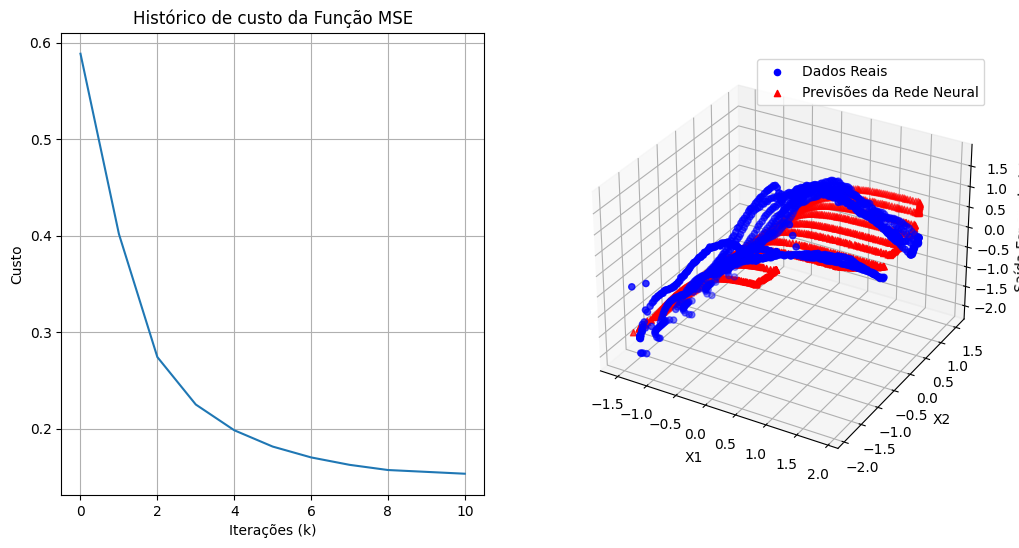

In [6]:
net = CreateNetwork(up=False)
TestNetwork(net, print_epochs=False)

W_h:  [[1. 1.]
 [1. 1.]] B_h: [[1. 1.]]
W_o:  [[1.]
 [1.]] B_o: [[1.]]


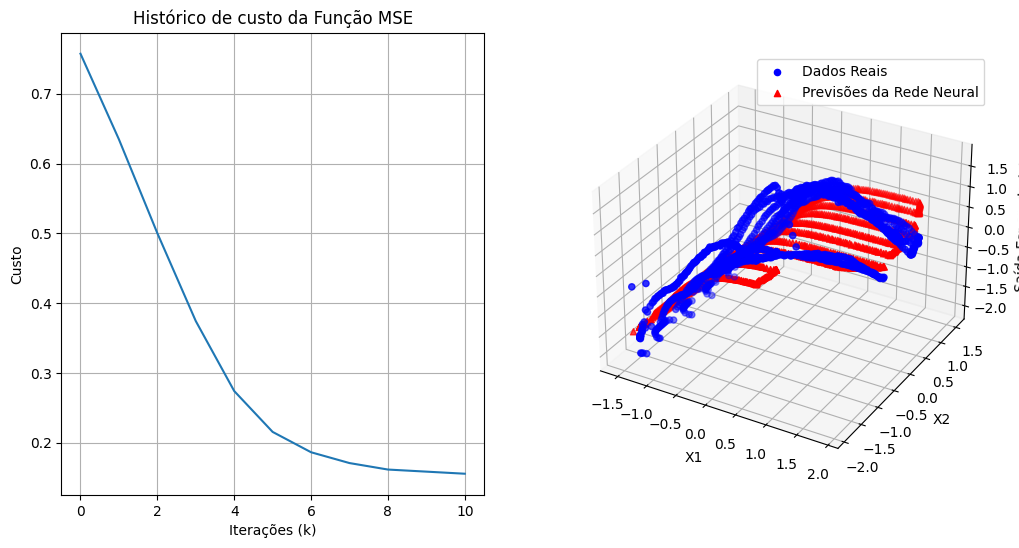

In [7]:
net = CreateNetwork(    w_h=np.array([[1.0, 1.0], [1.0, 1.0]]), 
                        b_h=np.array([1.0 , 1.0]),
                        w_o=np.array([[1.0, 1.0]]),
                        b_o=np.array([1.0]))
TestNetwork(net)


W_h:  [[0.5 0.5]
 [0.5 0.5]] B_h: [[0.5 0.5]]
W_o:  [[0.5]
 [0.5]] B_o: [[0.5]]


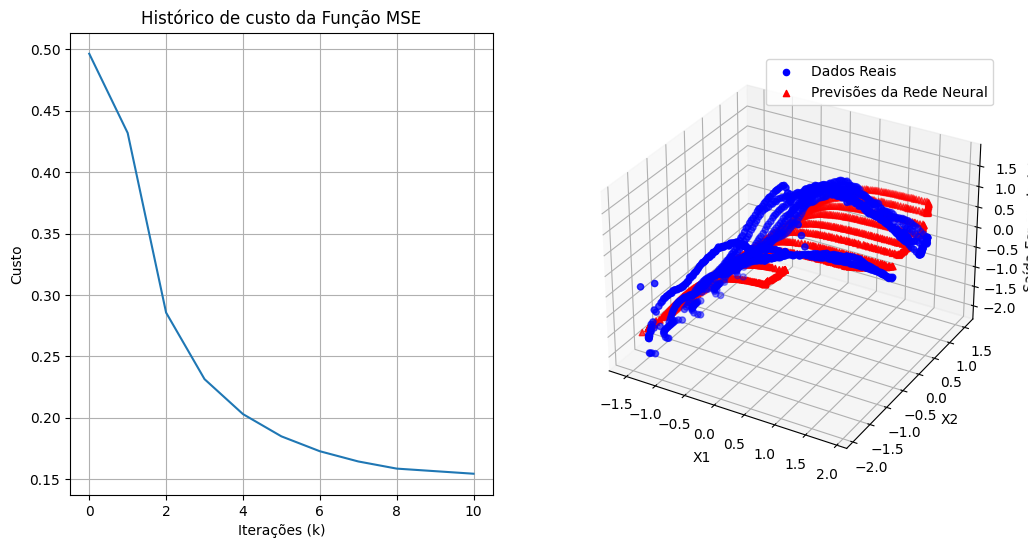

In [8]:
net = CreateNetwork(    w_h=np.array([[0.5, 0.5], [0.5, 0.5]]), 
                        b_h=np.array([0.5 , 0.5]),
                        w_o=np.array([[0.5, 0.5]]),
                        b_o=np.array([0.5]))
TestNetwork(net)


W_h:  [[2. 2.]
 [2. 2.]] B_h: [[2. 2.]]
W_o:  [[2.]
 [2.]] B_o: [[2.]]


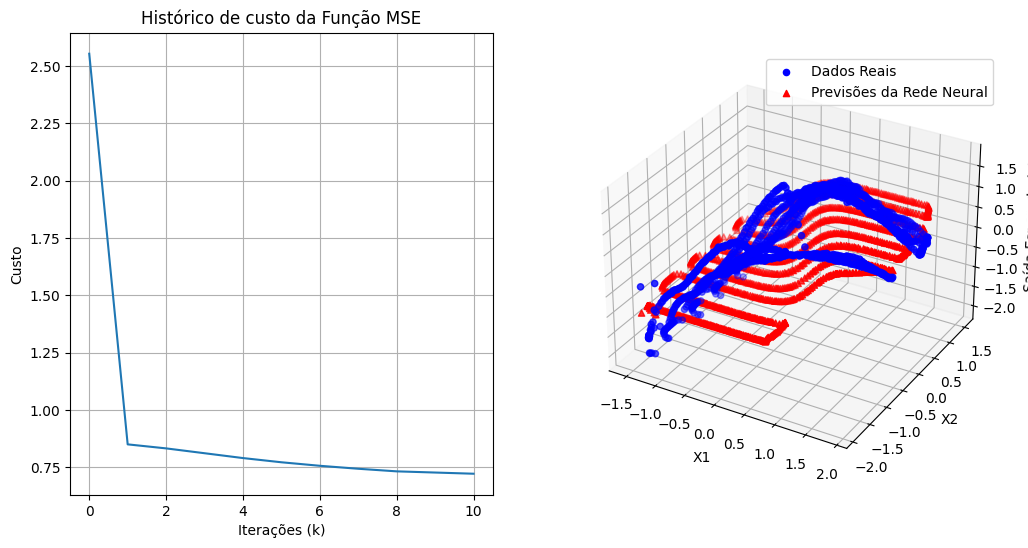

In [9]:
net = CreateNetwork(    w_h=np.array([[2.0, 2.0], [2.0, 2.0]]), 
                        b_h=np.array([2.0 , 2.0]),
                        w_o=np.array([[2.0, 2.0]]),
                        b_o=np.array([2.0]))
TestNetwork(net)

W_h:  [[0.85379299 0.86701643]
 [0.12262984 0.35067976]] B_h: [[0.31241522 0.21162247]]
W_o:  [[0.71236612]
 [0.90328847]] B_o: [[0.7710405]]


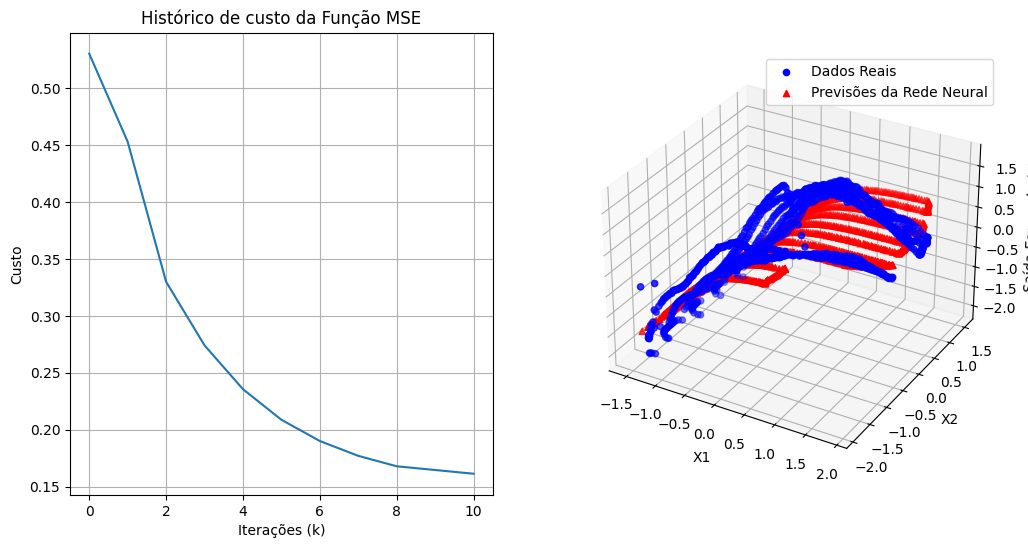

In [10]:
net = CreateNetwork(up=False)
TestNetwork(net)


W_h:  [[0.90934525 0.00468726]
 [0.73994916 0.53130365]] B_h: [[0.42353922 0.79414613]]
W_o:  [[0.28114681]
 [0.37060744]] B_o: [[0.77933094]]


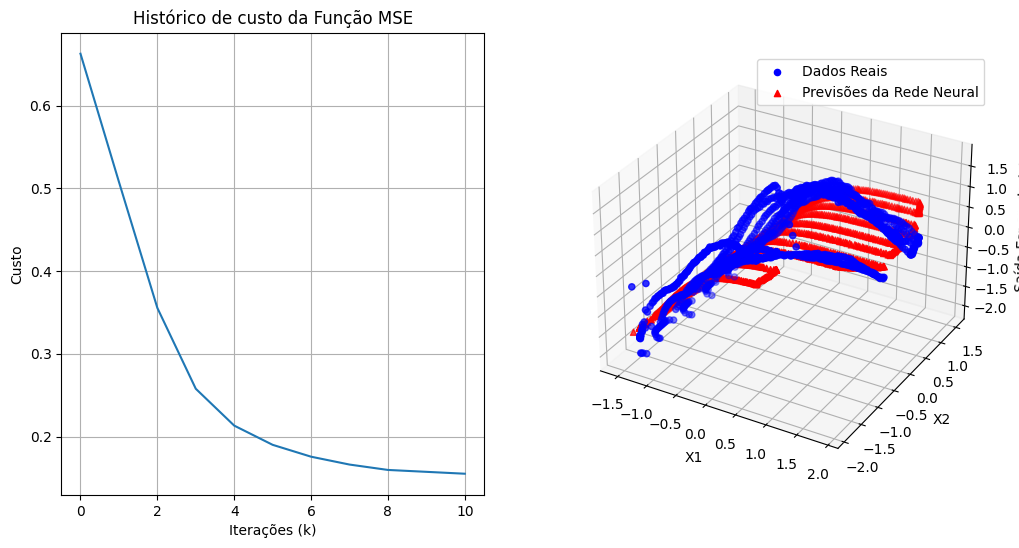

In [11]:
net = CreateNetwork(up=False)
TestNetwork(net)


W_h:  [[0.77675737 0.79047923]
 [0.91093359 0.70470117]] B_h: [[0.20668062 0.26486873]]
W_o:  [[0.63320956]
 [0.01420555]] B_o: [[0.26978717]]


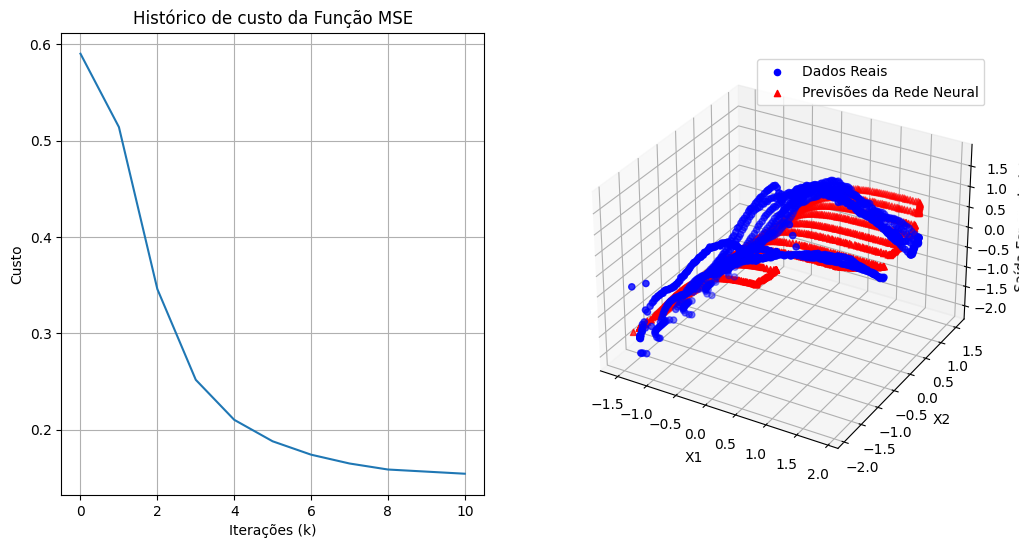

In [12]:
net = CreateNetwork(up=False)
TestNetwork(net)


W_h:  [[0.0636203  0.75929225]
 [0.19801493 0.43045255]] B_h: [[0.87353094 0.02730296]]
W_o:  [[0.42535926]
 [0.57349262]] B_o: [[0.80583884]]


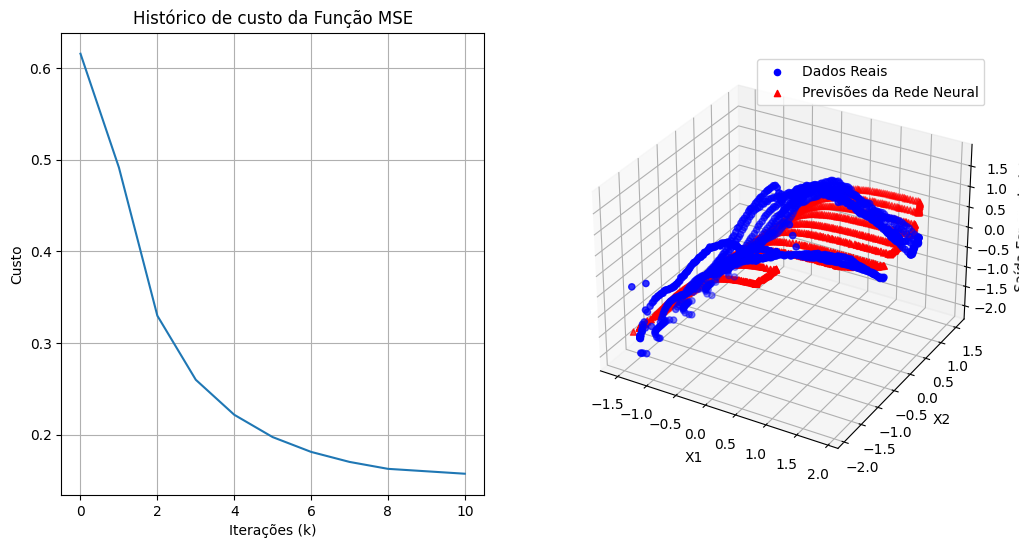

In [13]:
net = CreateNetwork(up=False)
TestNetwork(net)


# Referências bibliográficas

**[1]** HAYKIN, S. **Neural Networks and Learning Machines**. 3ed. Pearson, 2009